# In this script , I try to define a new meal definition based on what I did in [FEDPROTEINPRO](https://github.com/Htbibalan/FEDPROTEINPRO) and analysis the FEDPROTEIN experiment with this new approach, i.e. min pellet 1 pellet and snacks and mega meals included.  
# Here I will update the FED_function file to calculate more parameters of food intake such as snacks and mega meals

In [2]:
import trompy as tp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.display.max_rows= 4000
pd.options.display.max_columns= 4000

In [1]:
%run ..//source/FED_FUNCTIONS_NEwMEAL.py

In [3]:
mice["FEDXB01"].keys()

dict_keys(['sex', 'order', 'grain_timestamps', 'pr_timestamps', 'nr_timestamps', 'pr_meal_size', 'pr_snack_size', 'pr_number_of_meals', 'pr_meal_frequency', 'pr_number_of_snacks', 'pr_snack_frequency', 'pr_hourly_meals', 'pr_mega_meal_count', 'pr_average_mega_meal_size', 'nr_meal_size', 'nr_snack_size', 'nr_number_of_meals', 'nr_meal_frequency', 'nr_number_of_snacks', 'nr_snack_frequency', 'nr_hourly_meals', 'nr_mega_meal_count', 'nr_average_mega_meal_size', 'bodyweight', 'hoarding', 'grain_avg_pellets', 'pr_avg_pellets', 'nr_avg_pellets', 'grain_pellets_per_day', 'pr_pellets_per_day', 'nr_pellets_per_day', 'all_pellets_per_day', 'interpellet_intervals_pr', 'intermeal_interval_pr', 'mealsize_pr', 'interpellet_intervals_nr', 'intermeal_interval_nr', 'mealsize_nr'])

In [135]:
nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"} 

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


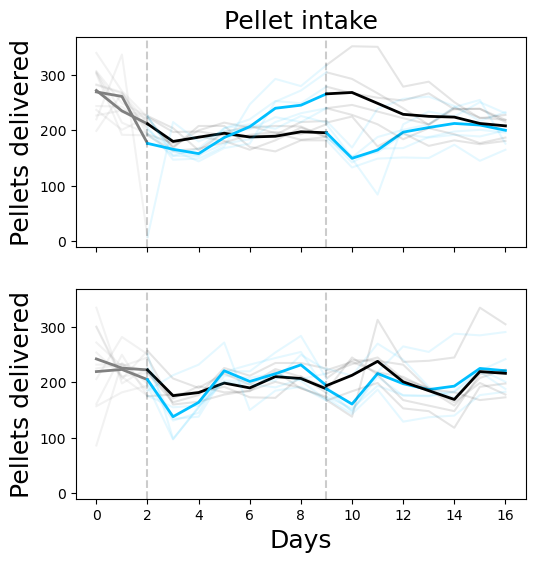

In [136]:
#plot shows timeline of total number of pellets delievered per day in NRPR and PRNR male and Females
def timeline_fig(data, ax=[], ylabel="", **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object
    
    for trace in data:
        ax.plot(trace, color="grey", alpha=0.3)
    ax.plot(np.mean(data, axis=0), linewidth=2)

    ax.set_ylabel(ylabel)
    ax.axvline(2, linestyle="--", color="k")
    ax.axvline(9, linestyle="--", color="k")

    return ax

def timeline_multicolor_fig(data, ax=[], ylabel="", colors=[], day_split=[2, 9], max_days=17, **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object

    colors_reversed = colors[-1:]
    #plt.rcParams["font.size"] = 18

    for group in data:
        for trace in group:
            trace = trace[:max_days]
            ax.plot(range(0,3), trace[:3], color="grey", alpha=0.1)
            ax.plot(range(2,10), trace[2:10], color=colors[0], alpha=0.1)
            ax.plot(range(9,len(trace)), trace[9:], color=colors[1], alpha=0.1)

        mean = np.mean(group, axis=0)[:max_days]
        ax.plot(range(0,3), mean[:3], color="grey", linewidth=2)
        ax.plot(range(2,10), mean[2:10], color=colors[0], linewidth=2)
        ax.plot(range(9,len(mean)), mean[9:], color=colors[1], linewidth=2)

        colors.reverse()

    ax.set_ylabel(ylabel, fontsize= 18)
    ax.axvline(2, linestyle="--", color="k", alpha=0.2)
    ax.axvline(9, linestyle="--", color="k", alpha=0.2)

    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
   

    return ax

nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"}

nrpr_m = get_data_fields(mice, ["all_pellets_per_day"], nrpr_male_selector)
prnr_m = get_data_fields(mice, ["all_pellets_per_day"], prnr_male_selector)
nrpr_f = get_data_fields(mice, ["all_pellets_per_day"], nrpr_female_selector)
prnr_f = get_data_fields(mice, ["all_pellets_per_day"], prnr_female_selector)

f, ax = plt.subplots(nrows=2, sharex=True, figsize=(6,6), gridspec_kw= {"left": 0.15})

timeline_multicolor_fig([nrpr_m, prnr_m], colors=["black", "deepskyblue"], ylabel="Pellets delivered", ax=ax[0])
timeline_multicolor_fig([nrpr_f, prnr_f], colors=["black", "deepskyblue"], ylabel="Pellets delivered", ax=ax[1])

ax[1].set_xlabel("Days", fontsize = 18)
ax[0].set_title("Pellet intake", fontsize = 18)
ax[1].set_ylim(ax[0].get_ylim())

figfolder = r"..//plots/NEW_MEAL_PLOTS//"

#f.savefig(figfolder + "timeline_pelletintake_blue.pdf")

In [137]:
nrpr_m

[[283,
  269,
  193,
  177,
  189,
  181,
  165,
  182,
  205,
  189,
  142,
  167,
  168,
  188,
  198,
  201,
  196],
 [305,
  233,
  223,
  168,
  208,
  208,
  170,
  162,
  182,
  182,
  133,
  149,
  151,
  150,
  174,
  145,
  165],
 [302,
  192,
  191,
  163,
  167,
  178,
  192,
  197,
  193,
  211,
  151,
  188,
  201,
  211,
  242,
  255,
  176],
 [199,
  267,
  214,
  171,
  200,
  214,
  205,
  208,
  207,
  187,
  153,
  160,
  193,
  187,
  192,
  189,
  200],
 [307,
  249,
  226,
  204,
  164,
  197,
  208,
  195,
  183,
  188,
  149,
  84,
  211,
  234,
  225,
  251,
  231],
 [237,
  201,
  224,
  197,
  198,
  191,
  188,
  192,
  215,
  217,
  169,
  239,
  257,
  261,
  244,
  217,
  233]]

In [27]:
mice["FEDXB01"].keys()

dict_keys(['sex', 'order', 'grain_timestamps', 'pr_timestamps', 'nr_timestamps', 'pr_meal_size', 'pr_snack_size', 'pr_number_of_meals', 'pr_meal_frequency', 'pr_number_of_snacks', 'pr_snack_frequency', 'pr_hourly_meals', 'pr_mega_meal_count', 'pr_average_mega_meal_size', 'nr_meal_size', 'nr_snack_size', 'nr_number_of_meals', 'nr_meal_frequency', 'nr_number_of_snacks', 'nr_snack_frequency', 'nr_hourly_meals', 'nr_mega_meal_count', 'nr_average_mega_meal_size', 'bodyweight', 'hoarding', 'grain_avg_pellets', 'pr_avg_pellets', 'nr_avg_pellets', 'grain_pellets_per_day', 'pr_pellets_per_day', 'nr_pellets_per_day', 'all_pellets_per_day', 'interpellet_intervals_pr', 'intermeal_interval_pr', 'mealsize_pr', 'interpellet_intervals_nr', 'intermeal_interval_nr', 'mealsize_nr'])

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>


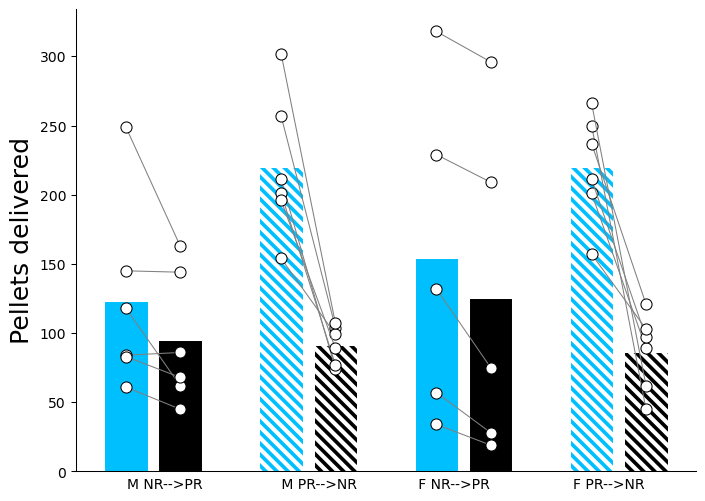

In [29]:
#plot for average number of pellets taken by NRPR and PRNR males and Females

nrpr_avg = get_data_fields(mice, ["pr_number_of_snacks","nr_number_of_snacks" ],nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_number_of_snacks", "nr_number_of_snacks"],prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_number_of_snacks","nr_number_of_snacks"],nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_number_of_snacks","nr_number_of_snacks"],prnr_female_selector)

f, ax = plt.subplots(figsize= (8, 6))
_, _, barlist, _ = tp.barscatter([nrpr_avg, prnr_avg, nrprf_avg, prnrf_avg], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"]*8, barfacecolor=["deepskyblue", "black", "deepskyblue", "black", "deepskyblue", "black", "deepskyblue", "black"],
barlabels = ["NRPR Males", "PRNR Males", "NRPR Females", "PRNR Females"] )

ax.set_ylabel("Pellets delivered",fontsize = 18)
ax.set_xlabel("M NR-->PR                  M PR-->NR              F NR-->PR                   F PR-->NR")
plt.rcParams["hatch.linewidth"] = 3

# this code puts hatching on bars 3 and 4 

for i in [barlist[2], barlist[3], barlist[6],barlist[7]]:
    print(i)
    bar = i.get_children()
    bar[0].set_hatch("\\\\\\")
    bar[0].set_edgecolor("white")


figfolder = r"..//plots/NEW_MEAL_PLOTS//"
#f.savefig(figfolder + "pellets_delivered_blue.pdf")

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>


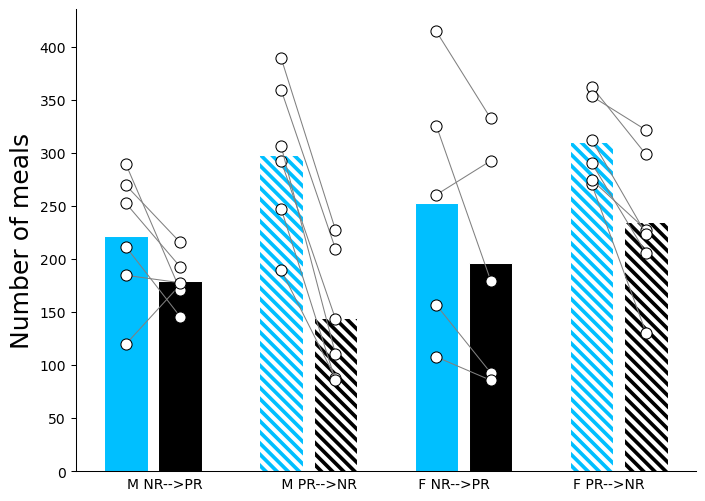

In [41]:
#plot for average number of pellets taken by NRPR and PRNR males and Females

nrpr_avg = get_data_fields(mice, ["pr_number_of_meals","nr_number_of_meals" ],nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_number_of_meals", "nr_number_of_meals"],prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_number_of_meals","nr_number_of_meals"],nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_number_of_meals","nr_number_of_meals"],prnr_female_selector)

f, ax = plt.subplots(figsize= (8, 6))
_, _, barlist, _ = tp.barscatter([nrpr_avg, prnr_avg, nrprf_avg, prnrf_avg], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"]*8, barfacecolor=["deepskyblue", "black", "deepskyblue", "black", "deepskyblue", "black", "deepskyblue", "black"],
barlabels = ["NRPR Males", "PRNR Males", "NRPR Females", "PRNR Females"] )

ax.set_ylabel("Number of meals",fontsize = 18)
ax.set_xlabel("M NR-->PR                  M PR-->NR              F NR-->PR                   F PR-->NR")
plt.rcParams["hatch.linewidth"] = 3

# this code puts hatching on bars 3 and 4 

for i in [barlist[2], barlist[3], barlist[6],barlist[7]]:
    print(i)
    bar = i.get_children()
    bar[0].set_hatch("\\\\\\")
    bar[0].set_edgecolor("white")



figfolder = r"C:\Users\hta031\Github\FEDProtein\results\\"
#f.savefig(figfolder + "pellets_delivered_blue.pdf")

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>


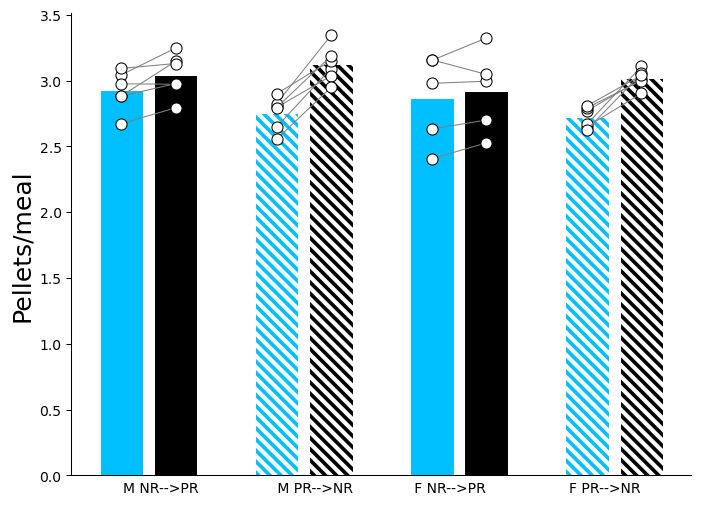

In [40]:
#plot for average number of pellets taken by NRPR and PRNR males and Females

nrpr_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size" ],nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_meal_size", "nr_meal_size"],prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"],nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"],prnr_female_selector)

f, ax = plt.subplots(figsize= (8, 6))
_, _, barlist, _ = tp.barscatter([nrpr_avg, prnr_avg, nrprf_avg, prnrf_avg], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"]*8, barfacecolor=["deepskyblue", "black", "deepskyblue", "black", "deepskyblue", "black", "deepskyblue", "black"],
barlabels = ["NRPR Males", "PRNR Males", "NRPR Females", "PRNR Females"] )

ax.set_ylabel("Pellets/meal",fontsize = 18)
ax.set_xlabel("M NR-->PR                  M PR-->NR              F NR-->PR                   F PR-->NR")
plt.rcParams["hatch.linewidth"] = 3

# this code puts hatching on bars 3 and 4 

for i in [barlist[2], barlist[3], barlist[6],barlist[7]]:
    print(i)
    bar = i.get_children()
    bar[0].set_hatch("\\\\\\")
    bar[0].set_edgecolor("white")



figfolder = r"C:\Users\hta031\Github\FEDProtein\results\\"
#f.savefig(figfolder + "pellets_delivered_blue.pdf")

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>


c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: linewuidth is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


list

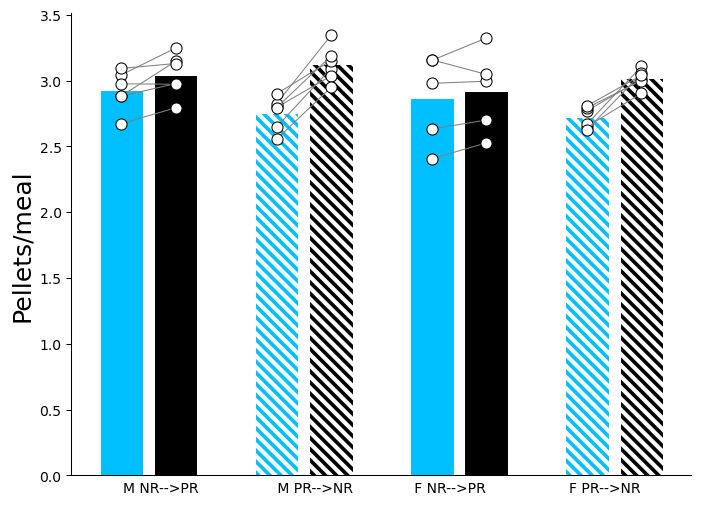

In [63]:
import numpy as np

#plot for average number of pellets taken by NRPR and PRNR males and Females

nrpr_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size" ],nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_meal_size", "nr_meal_size"],prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"],nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"],prnr_female_selector)

f, ax = plt.subplots(figsize= (8, 6))
_, _, barlist, _ = tp.barscatter([nrpr_avg, prnr_avg, nrprf_avg, prnrf_avg], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"]*8, barfacecolor=["deepskyblue", "black", "deepskyblue", "black", "deepskyblue", "black", "deepskyblue", "black"],
barlabels = ["NRPR Males", "PRNR Males", "NRPR Females", "PRNR Females"] )

ax.set_ylabel("Pellets/meal",fontsize = 18)
ax.set_xlabel("M NR-->PR                  M PR-->NR              F NR-->PR                   F PR-->NR")
plt.rcParams["hatch.linewidth"] = 3

# this code puts hatching on bars 3 and 4 

for i in [barlist[2], barlist[3], barlist[6],barlist[7]]:
    print(i)
    bar = i.get_children()
    bar[0].set_hatch("\\\\\\")
    bar[0].set_edgecolor("white")



figfolder = r"C:\Users\hta031\Github\FEDProtein\results\\"
#f.savefig(figfolder + "pellets_delivered_blue.pdf")





6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


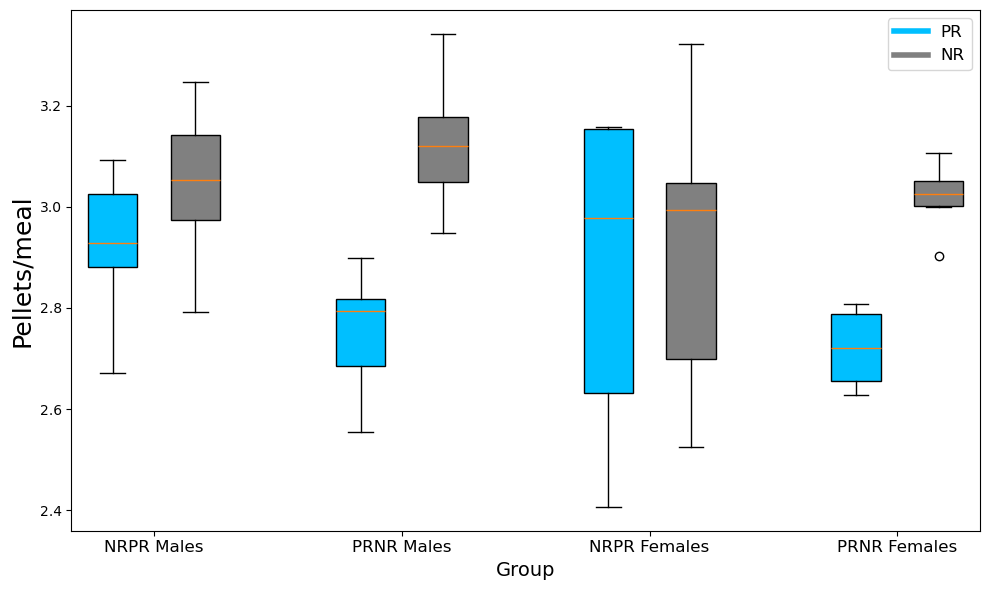

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Data extraction using your actual function
nrpr_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_meal_size", "nr_meal_size"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], prnr_female_selector)

# Combine all data for easier plotting
data = [nrpr_avg[0], nrpr_avg[1], prnr_avg[0], prnr_avg[1],
        nrprf_avg[0], nrprf_avg[1], prnrf_avg[0], prnrf_avg[1]]

group_labels = ["NRPR Males", "PRNR Males", "NRPR Females", "PRNR Females"]

colors = ["deepskyblue", "gray", "deepskyblue", "gray", "deepskyblue", "gray", "deepskyblue", "gray"]

# Create the plot
f, ax = plt.subplots(figsize=(10, 6))

# Create box plots with groupings
positions = [1, 2, 4, 5, 7, 8, 10, 11]
box = ax.boxplot(data, positions=positions, patch_artist=True, widths=0.6)

# Color the boxes
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Adjust x-axis to group labels
ax.set_xticks([1.5, 4.5, 7.5, 10.5])
ax.set_xticklabels(group_labels, fontsize=12)

# Customizing the y-axis label
ax.set_ylabel("Pellets/meal", fontsize=18)
ax.set_xlabel("Group", fontsize=14)

# Add legend for colors
custom_lines = [plt.Line2D([0], [0], color='deepskyblue', lw=4),
                plt.Line2D([0], [0], color='gray', lw=4)]
ax.legend(custom_lines, ['PR', 'NR'], fontsize=12)

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Save the figure if needed
# figfolder = r"C:\Users\hta031\Github\FEDProtein\results\\"
# f.savefig(figfolder + "pellets_box_plot_grouped.pdf")


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


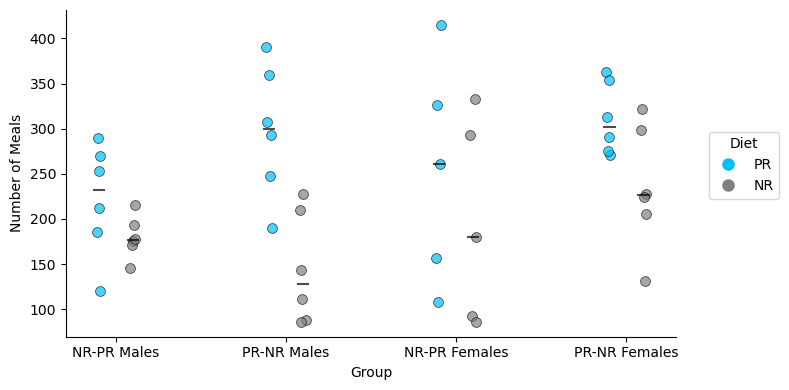

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data extraction using your actual function
nrpr_avg = get_data_fields(mice, ["pr_number_of_meals","nr_number_of_meals"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_number_of_meals", "nr_number_of_meals"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_number_of_meals","nr_number_of_meals"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_number_of_meals","nr_number_of_meals"], prnr_female_selector)

# Combine all data for easier plotting
data = [nrpr_avg[0], nrpr_avg[1], prnr_avg[0], prnr_avg[1],
        nrprf_avg[0], nrprf_avg[1], prnrf_avg[0], prnrf_avg[1]]

group_labels = ["NR-PR Males (PR)", "NR-PR Males (NR)", "PR-NR Males (PR)", "PR-NR Males (NR)",
                "NR-PR Females (PR)", "NR-PR Females (NR)", "PR-NR Females (PR)", "PR-NR Females (NR)"]

colors = {"PR": "deepskyblue", "NR": "grey"}
offset = {"PR": -0.1, "NR": 0.1}  # Reduced offset for compactness
group_mapping = {
    "NR-PR Males (PR)": ("NR-PR Males", "PR"),
    "NR-PR Males (NR)": ("NR-PR Males", "NR"),
    "PR-NR Males (PR)": ("PR-NR Males", "PR"),
    "PR-NR Males (NR)": ("PR-NR Males", "NR"),
    "NR-PR Females (PR)": ("NR-PR Females", "PR"),
    "NR-PR Females (NR)": ("NR-PR Females", "NR"),
    "PR-NR Females (PR)": ("PR-NR Females", "PR"),
    "PR-NR Females (NR)": ("PR-NR Females", "NR")
}

group_positions = {
    "NR-PR Males": 0,
    "PR-NR Males": 1,
    "NR-PR Females": 2,
    "PR-NR Females": 3
}

# Create a figure and axis with smaller size for compactness
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the scatter plot with reduced jitter and smaller markers
jitter_strength = 0.02  # Reduced jitter for more compact spacing
for i, group_label in enumerate(group_labels):
    group, diet = group_mapping[group_label]
    jitter = np.random.uniform(-jitter_strength, jitter_strength, size=len(data[i]))
    x_positions = [group_positions[group] + offset[diet] + jitter_val for jitter_val in jitter]
    sns.scatterplot(x=x_positions, y=data[i], color=colors[diet], s=50, alpha=0.7, edgecolor="black")  # Smaller markers

# Add median lines with slight adjustments for compactness
for group in ["NR-PR Males", "PR-NR Males", "NR-PR Females", "PR-NR Females"]:
    for diet in ["PR", "NR"]:
        relevant_data = []
        for group_label in group_labels:
            mapped_group, mapped_diet = group_mapping[group_label]
            if mapped_group == group and mapped_diet == diet:
                relevant_data.extend(data[group_labels.index(group_label)])
        median_value = np.median(relevant_data)
        x_val = group_positions[group] + offset[diet]
        ax.plot([x_val - 0.03, x_val + 0.03], [median_value, median_value], color='k', linewidth=1.5, alpha=0.7)

# Customize the legend by manually adding it
custom_lines = [plt.Line2D([0], [0], color=colors["PR"], marker='o', linestyle='', markersize=8, label='PR'),
                plt.Line2D([0], [0], color=colors["NR"], marker='o', linestyle='', markersize=8, label='NR')]
plt.legend(handles=custom_lines, title="Diet", loc="upper right", frameon=True, borderaxespad=-3, bbox_to_anchor=(1.1, 0.5))

# Customize the plot aesthetics with tighter spacing
plt.xticks([group_positions["NR-PR Males"], group_positions["PR-NR Males"],
            group_positions["NR-PR Females"], group_positions["PR-NR Females"]],
           ["NR-PR Males", "PR-NR Males", "NR-PR Females", "PR-NR Females"], fontsize=10)
plt.xlabel("Group")
plt.ylabel("Number of Meals")

# Remove the background grid lines and spines
plt.grid(False)
sns.despine()

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Save the figure if needed
# fig.savefig("pellets_scatter_plot_compact.pdf")


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


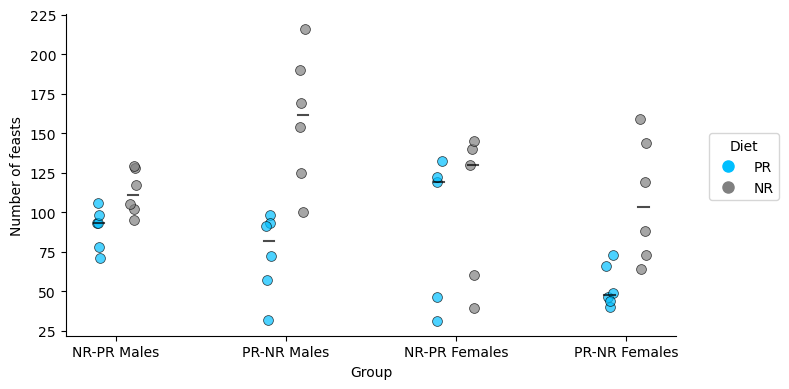

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data extraction using your actual function
nrpr_avg = get_data_fields(mice, ["pr_mega_meal_count","nr_mega_meal_count"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_mega_meal_count", "nr_mega_meal_count"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_mega_meal_count","nr_mega_meal_count"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_mega_meal_count","nr_mega_meal_count"], prnr_female_selector)

# Combine all data for easier plotting
data = [nrpr_avg[0], nrpr_avg[1], prnr_avg[0], prnr_avg[1],
        nrprf_avg[0], nrprf_avg[1], prnrf_avg[0], prnrf_avg[1]]

group_labels = ["NR-PR Males (PR)", "NR-PR Males (NR)", "PR-NR Males (PR)", "PR-NR Males (NR)",
                "NR-PR Females (PR)", "NR-PR Females (NR)", "PR-NR Females (PR)", "PR-NR Females (NR)"]

colors = {"PR": "deepskyblue", "NR": "grey"}
offset = {"PR": -0.1, "NR": 0.1}  # Reduced offset for compactness
group_mapping = {
    "NR-PR Males (PR)": ("NR-PR Males", "PR"),
    "NR-PR Males (NR)": ("NR-PR Males", "NR"),
    "PR-NR Males (PR)": ("PR-NR Males", "PR"),
    "PR-NR Males (NR)": ("PR-NR Males", "NR"),
    "NR-PR Females (PR)": ("NR-PR Females", "PR"),
    "NR-PR Females (NR)": ("NR-PR Females", "NR"),
    "PR-NR Females (PR)": ("PR-NR Females", "PR"),
    "PR-NR Females (NR)": ("PR-NR Females", "NR")
}

group_positions = {
    "NR-PR Males": 0,
    "PR-NR Males": 1,
    "NR-PR Females": 2,
    "PR-NR Females": 3
}

# Create a figure and axis with smaller size for compactness
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the scatter plot with reduced jitter and smaller markers
jitter_strength = 0.02  # Reduced jitter for more compact spacing
for i, group_label in enumerate(group_labels):
    group, diet = group_mapping[group_label]
    jitter = np.random.uniform(-jitter_strength, jitter_strength, size=len(data[i]))
    x_positions = [group_positions[group] + offset[diet] + jitter_val for jitter_val in jitter]
    sns.scatterplot(x=x_positions, y=data[i], color=colors[diet], s=50, alpha=0.7, edgecolor="black")  # Smaller markers

# Add median lines with slight adjustments for compactness
for group in ["NR-PR Males", "PR-NR Males", "NR-PR Females", "PR-NR Females"]:
    for diet in ["PR", "NR"]:
        relevant_data = []
        for group_label in group_labels:
            mapped_group, mapped_diet = group_mapping[group_label]
            if mapped_group == group and mapped_diet == diet:
                relevant_data.extend(data[group_labels.index(group_label)])
        median_value = np.median(relevant_data)
        x_val = group_positions[group] + offset[diet]
        ax.plot([x_val - 0.03, x_val + 0.03], [median_value, median_value], color='k', linewidth=1.5, alpha=0.7)

# Customize the legend by manually adding it
custom_lines = [plt.Line2D([0], [0], color=colors["PR"], marker='o', linestyle='', markersize=8, label='PR'),
                plt.Line2D([0], [0], color=colors["NR"], marker='o', linestyle='', markersize=8, label='NR')]
plt.legend(handles=custom_lines, title="Diet", loc="upper right", frameon=True, borderaxespad=-3, bbox_to_anchor=(1.1, 0.5))

# Customize the plot aesthetics with tighter spacing
plt.xticks([group_positions["NR-PR Males"], group_positions["PR-NR Males"],
            group_positions["NR-PR Females"], group_positions["PR-NR Females"]],
           ["NR-PR Males", "PR-NR Males", "NR-PR Females", "PR-NR Females"], fontsize=10)
plt.xlabel("Group")
plt.ylabel("Number of feasts")

# Remove the background grid lines and spines
plt.grid(False)
sns.despine()

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Save the figure if needed
# fig.savefig("pellets_scatter_plot_compact.pdf")


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


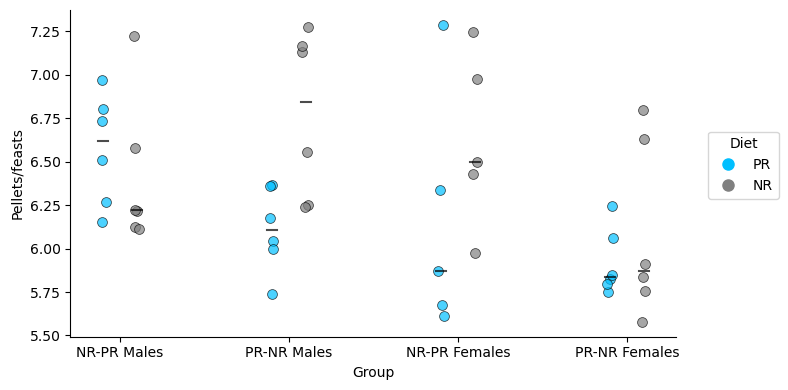

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data extraction using your actual function
nrpr_avg = get_data_fields(mice, ["pr_average_mega_meal_size","nr_average_mega_meal_size"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_average_mega_meal_size", "nr_average_mega_meal_size"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_average_mega_meal_size","nr_average_mega_meal_size"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_average_mega_meal_size","nr_average_mega_meal_size"], prnr_female_selector)

# Combine all data for easier plotting
data = [nrpr_avg[0], nrpr_avg[1], prnr_avg[0], prnr_avg[1],
        nrprf_avg[0], nrprf_avg[1], prnrf_avg[0], prnrf_avg[1]]

group_labels = ["NR-PR Males (PR)", "NR-PR Males (NR)", "PR-NR Males (PR)", "PR-NR Males (NR)",
                "NR-PR Females (PR)", "NR-PR Females (NR)", "PR-NR Females (PR)", "PR-NR Females (NR)"]

colors = {"PR": "deepskyblue", "NR": "grey"}
offset = {"PR": -0.1, "NR": 0.1}  # Reduced offset for compactness
group_mapping = {
    "NR-PR Males (PR)": ("NR-PR Males", "PR"),
    "NR-PR Males (NR)": ("NR-PR Males", "NR"),
    "PR-NR Males (PR)": ("PR-NR Males", "PR"),
    "PR-NR Males (NR)": ("PR-NR Males", "NR"),
    "NR-PR Females (PR)": ("NR-PR Females", "PR"),
    "NR-PR Females (NR)": ("NR-PR Females", "NR"),
    "PR-NR Females (PR)": ("PR-NR Females", "PR"),
    "PR-NR Females (NR)": ("PR-NR Females", "NR")
}

group_positions = {
    "NR-PR Males": 0,
    "PR-NR Males": 1,
    "NR-PR Females": 2,
    "PR-NR Females": 3
}

# Create a figure and axis with smaller size for compactness
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the scatter plot with reduced jitter and smaller markers
jitter_strength = 0.02  # Reduced jitter for more compact spacing
for i, group_label in enumerate(group_labels):
    group, diet = group_mapping[group_label]
    jitter = np.random.uniform(-jitter_strength, jitter_strength, size=len(data[i]))
    x_positions = [group_positions[group] + offset[diet] + jitter_val for jitter_val in jitter]
    sns.scatterplot(x=x_positions, y=data[i], color=colors[diet], s=50, alpha=0.7, edgecolor="black")  # Smaller markers

# Add median lines with slight adjustments for compactness
for group in ["NR-PR Males", "PR-NR Males", "NR-PR Females", "PR-NR Females"]:
    for diet in ["PR", "NR"]:
        relevant_data = []
        for group_label in group_labels:
            mapped_group, mapped_diet = group_mapping[group_label]
            if mapped_group == group and mapped_diet == diet:
                relevant_data.extend(data[group_labels.index(group_label)])
        median_value = np.median(relevant_data)
        x_val = group_positions[group] + offset[diet]
        ax.plot([x_val - 0.03, x_val + 0.03], [median_value, median_value], color='k', linewidth=1.5, alpha=0.7)

# Customize the legend by manually adding it
custom_lines = [plt.Line2D([0], [0], color=colors["PR"], marker='o', linestyle='', markersize=8, label='PR'),
                plt.Line2D([0], [0], color=colors["NR"], marker='o', linestyle='', markersize=8, label='NR')]
plt.legend(handles=custom_lines, title="Diet", loc="upper right", frameon=True, borderaxespad=-3, bbox_to_anchor=(1.1, 0.5))

# Customize the plot aesthetics with tighter spacing
plt.xticks([group_positions["NR-PR Males"], group_positions["PR-NR Males"],
            group_positions["NR-PR Females"], group_positions["PR-NR Females"]],
           ["NR-PR Males", "PR-NR Males", "NR-PR Females", "PR-NR Females"], fontsize=10)
plt.xlabel("Group")
plt.ylabel("Pellets/feasts")

# Remove the background grid lines and spines
plt.grid(False)
sns.despine()

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Save the figure if needed
# fig.savefig("pellets_scatter_plot_compact.pdf")


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


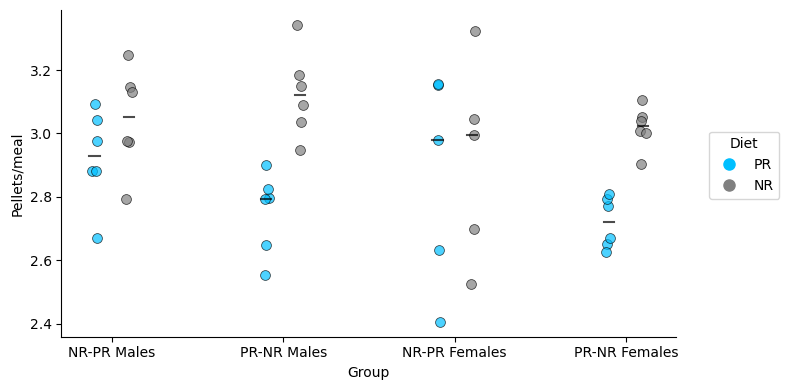

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data extraction using your actual function
nrpr_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_meal_size", "nr_meal_size"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], prnr_female_selector)

# Combine all data for easier plotting
data = [nrpr_avg[0], nrpr_avg[1], prnr_avg[0], prnr_avg[1],
        nrprf_avg[0], nrprf_avg[1], prnrf_avg[0], prnrf_avg[1]]

group_labels = ["NR-PR Males (PR)", "NR-PR Males (NR)", "PR-NR Males (PR)", "PR-NR Males (NR)",
                "NR-PR Females (PR)", "NR-PR Females (NR)", "PR-NR Females (PR)", "PR-NR Females (NR)"]

colors = {"PR": "deepskyblue", "NR": "grey"}
offset = {"PR": -0.1, "NR": 0.1}  # Reduced offset for compactness
group_mapping = {
    "NR-PR Males (PR)": ("NR-PR Males", "PR"),
    "NR-PR Males (NR)": ("NR-PR Males", "NR"),
    "PR-NR Males (PR)": ("PR-NR Males", "PR"),
    "PR-NR Males (NR)": ("PR-NR Males", "NR"),
    "NR-PR Females (PR)": ("NR-PR Females", "PR"),
    "NR-PR Females (NR)": ("NR-PR Females", "NR"),
    "PR-NR Females (PR)": ("PR-NR Females", "PR"),
    "PR-NR Females (NR)": ("PR-NR Females", "NR")
}

group_positions = {
    "NR-PR Males": 0,
    "PR-NR Males": 1,
    "NR-PR Females": 2,
    "PR-NR Females": 3
}

# Create a figure and axis with smaller size for compactness
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the scatter plot with reduced jitter and smaller markers
jitter_strength = 0.02  # Reduced jitter for more compact spacing
for i, group_label in enumerate(group_labels):
    group, diet = group_mapping[group_label]
    jitter = np.random.uniform(-jitter_strength, jitter_strength, size=len(data[i]))
    x_positions = [group_positions[group] + offset[diet] + jitter_val for jitter_val in jitter]
    sns.scatterplot(x=x_positions, y=data[i], color=colors[diet], s=50, alpha=0.7, edgecolor="black")  # Smaller markers

# Add median lines with slight adjustments for compactness
for group in ["NR-PR Males", "PR-NR Males", "NR-PR Females", "PR-NR Females"]:
    for diet in ["PR", "NR"]:
        relevant_data = []
        for group_label in group_labels:
            mapped_group, mapped_diet = group_mapping[group_label]
            if mapped_group == group and mapped_diet == diet:
                relevant_data.extend(data[group_labels.index(group_label)])
        median_value = np.median(relevant_data)
        x_val = group_positions[group] + offset[diet]
        ax.plot([x_val - 0.03, x_val + 0.03], [median_value, median_value], color='k', linewidth=1.5, alpha=0.7)

# Customize the legend by manually adding it
custom_lines = [plt.Line2D([0], [0], color=colors["PR"], marker='o', linestyle='', markersize=8, label='PR'),
                plt.Line2D([0], [0], color=colors["NR"], marker='o', linestyle='', markersize=8, label='NR')]
plt.legend(handles=custom_lines, title="Diet", loc="upper right", frameon=True, borderaxespad=-3, bbox_to_anchor=(1.1, 0.5))

# Customize the plot aesthetics with tighter spacing
plt.xticks([group_positions["NR-PR Males"], group_positions["PR-NR Males"],
            group_positions["NR-PR Females"], group_positions["PR-NR Females"]],
           ["NR-PR Males", "PR-NR Males", "NR-PR Females", "PR-NR Females"], fontsize=10)
plt.xlabel("Group")
plt.ylabel("Pellets/meal")

# Remove the background grid lines and spines
plt.grid(False)
sns.despine()

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Save the figure if needed
# fig.savefig("pellets_scatter_plot_compact.pdf")


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


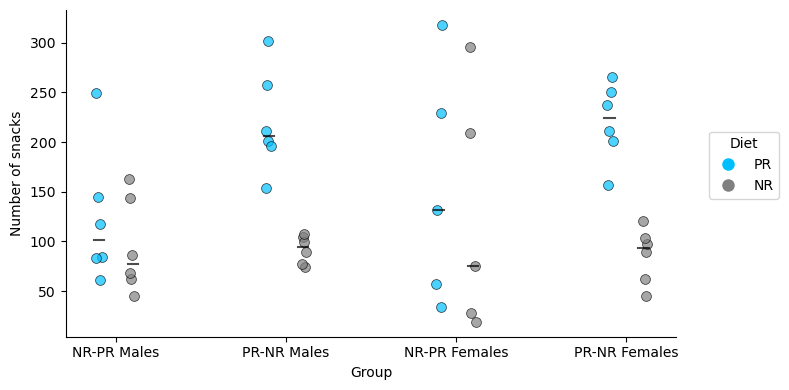

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data extraction using your actual function
nrpr_avg = get_data_fields(mice, ["pr_number_of_snacks","nr_number_of_snacks"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_number_of_snacks", "nr_number_of_snacks"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_number_of_snacks","nr_number_of_snacks"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_number_of_snacks","nr_number_of_snacks"], prnr_female_selector)

# Combine all data for easier plotting
data = [nrpr_avg[0], nrpr_avg[1], prnr_avg[0], prnr_avg[1],
        nrprf_avg[0], nrprf_avg[1], prnrf_avg[0], prnrf_avg[1]]

group_labels = ["NR-PR Males (PR)", "NR-PR Males (NR)", "PR-NR Males (PR)", "PR-NR Males (NR)",
                "NR-PR Females (PR)", "NR-PR Females (NR)", "PR-NR Females (PR)", "PR-NR Females (NR)"]

colors = {"PR": "deepskyblue", "NR": "grey"}
offset = {"PR": -0.1, "NR": 0.1}  # Reduced offset for compactness
group_mapping = {
    "NR-PR Males (PR)": ("NR-PR Males", "PR"),
    "NR-PR Males (NR)": ("NR-PR Males", "NR"),
    "PR-NR Males (PR)": ("PR-NR Males", "PR"),
    "PR-NR Males (NR)": ("PR-NR Males", "NR"),
    "NR-PR Females (PR)": ("NR-PR Females", "PR"),
    "NR-PR Females (NR)": ("NR-PR Females", "NR"),
    "PR-NR Females (PR)": ("PR-NR Females", "PR"),
    "PR-NR Females (NR)": ("PR-NR Females", "NR")
}

group_positions = {
    "NR-PR Males": 0,
    "PR-NR Males": 1,
    "NR-PR Females": 2,
    "PR-NR Females": 3
}

# Create a figure and axis with smaller size for compactness
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the scatter plot with reduced jitter and smaller markers
jitter_strength = 0.02  # Reduced jitter for more compact spacing
for i, group_label in enumerate(group_labels):
    group, diet = group_mapping[group_label]
    jitter = np.random.uniform(-jitter_strength, jitter_strength, size=len(data[i]))
    x_positions = [group_positions[group] + offset[diet] + jitter_val for jitter_val in jitter]
    sns.scatterplot(x=x_positions, y=data[i], color=colors[diet], s=50, alpha=0.7, edgecolor="black")  # Smaller markers

# Add median lines with slight adjustments for compactness
for group in ["NR-PR Males", "PR-NR Males", "NR-PR Females", "PR-NR Females"]:
    for diet in ["PR", "NR"]:
        relevant_data = []
        for group_label in group_labels:
            mapped_group, mapped_diet = group_mapping[group_label]
            if mapped_group == group and mapped_diet == diet:
                relevant_data.extend(data[group_labels.index(group_label)])
        median_value = np.median(relevant_data)
        x_val = group_positions[group] + offset[diet]
        ax.plot([x_val - 0.03, x_val + 0.03], [median_value, median_value], color='k', linewidth=1.5, alpha=0.7)

# Customize the legend by manually adding it
custom_lines = [plt.Line2D([0], [0], color=colors["PR"], marker='o', linestyle='', markersize=8, label='PR'),
                plt.Line2D([0], [0], color=colors["NR"], marker='o', linestyle='', markersize=8, label='NR')]
plt.legend(handles=custom_lines, title="Diet", loc="upper right", frameon=True, borderaxespad=-3, bbox_to_anchor=(1.1, 0.5))

# Customize the plot aesthetics with tighter spacing
plt.xticks([group_positions["NR-PR Males"], group_positions["PR-NR Males"],
            group_positions["NR-PR Females"], group_positions["PR-NR Females"]],
           ["NR-PR Males", "PR-NR Males", "NR-PR Females", "PR-NR Females"], fontsize=10)
plt.xlabel("Group")
plt.ylabel("Number of snacks")

# Remove the background grid lines and spines
plt.grid(False)
sns.despine()

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Save the figure if needed
# fig.savefig("pellets_scatter_plot_compact.pdf")


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


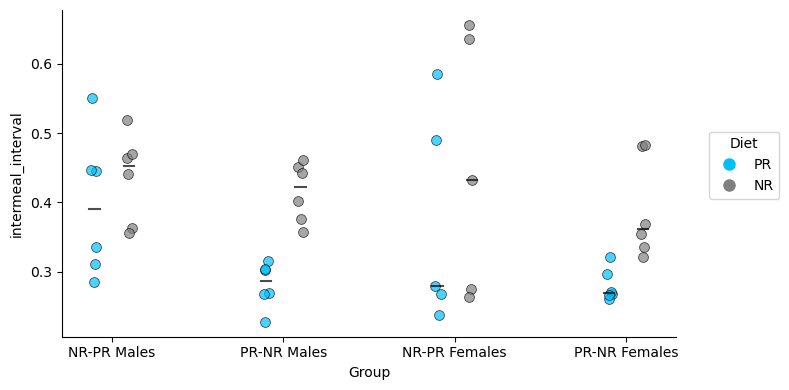

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data extraction using your actual function
nrpr_avg = get_data_fields(mice, ["intermeal_interval_pr","intermeal_interval_nr"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["intermeal_interval_pr", "intermeal_interval_nr"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["intermeal_interval_pr","intermeal_interval_nr"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["intermeal_interval_pr","intermeal_interval_nr"], prnr_female_selector)

# Combine all data for easier plotting
data = [nrpr_avg[0], nrpr_avg[1], prnr_avg[0], prnr_avg[1],
        nrprf_avg[0], nrprf_avg[1], prnrf_avg[0], prnrf_avg[1]]

group_labels = ["NR-PR Males (PR)", "NR-PR Males (NR)", "PR-NR Males (PR)", "PR-NR Males (NR)",
                "NR-PR Females (PR)", "NR-PR Females (NR)", "PR-NR Females (PR)", "PR-NR Females (NR)"]

colors = {"PR": "deepskyblue", "NR": "grey"}
offset = {"PR": -0.1, "NR": 0.1}  # Reduced offset for compactness
group_mapping = {
    "NR-PR Males (PR)": ("NR-PR Males", "PR"),
    "NR-PR Males (NR)": ("NR-PR Males", "NR"),
    "PR-NR Males (PR)": ("PR-NR Males", "PR"),
    "PR-NR Males (NR)": ("PR-NR Males", "NR"),
    "NR-PR Females (PR)": ("NR-PR Females", "PR"),
    "NR-PR Females (NR)": ("NR-PR Females", "NR"),
    "PR-NR Females (PR)": ("PR-NR Females", "PR"),
    "PR-NR Females (NR)": ("PR-NR Females", "NR")
}

group_positions = {
    "NR-PR Males": 0,
    "PR-NR Males": 1,
    "NR-PR Females": 2,
    "PR-NR Females": 3
}

# Create a figure and axis with smaller size for compactness
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the scatter plot with reduced jitter and smaller markers
jitter_strength = 0.02  # Reduced jitter for more compact spacing
for i, group_label in enumerate(group_labels):
    group, diet = group_mapping[group_label]
    jitter = np.random.uniform(-jitter_strength, jitter_strength, size=len(data[i]))
    x_positions = [group_positions[group] + offset[diet] + jitter_val for jitter_val in jitter]
    sns.scatterplot(x=x_positions, y=data[i], color=colors[diet], s=50, alpha=0.7, edgecolor="black")  # Smaller markers

# Add median lines with slight adjustments for compactness
for group in ["NR-PR Males", "PR-NR Males", "NR-PR Females", "PR-NR Females"]:
    for diet in ["PR", "NR"]:
        relevant_data = []
        for group_label in group_labels:
            mapped_group, mapped_diet = group_mapping[group_label]
            if mapped_group == group and mapped_diet == diet:
                relevant_data.extend(data[group_labels.index(group_label)])
        median_value = np.median(relevant_data)
        x_val = group_positions[group] + offset[diet]
        ax.plot([x_val - 0.03, x_val + 0.03], [median_value, median_value], color='k', linewidth=1.5, alpha=0.7)

# Customize the legend by manually adding it
custom_lines = [plt.Line2D([0], [0], color=colors["PR"], marker='o', linestyle='', markersize=8, label='PR'),
                plt.Line2D([0], [0], color=colors["NR"], marker='o', linestyle='', markersize=8, label='NR')]
plt.legend(handles=custom_lines, title="Diet", loc="upper right", frameon=True, borderaxespad=-3, bbox_to_anchor=(1.1, 0.5))

# Customize the plot aesthetics with tighter spacing
plt.xticks([group_positions["NR-PR Males"], group_positions["PR-NR Males"],
            group_positions["NR-PR Females"], group_positions["PR-NR Females"]],
           ["NR-PR Males", "PR-NR Males", "NR-PR Females", "PR-NR Females"], fontsize=10)
plt.xlabel("Group")
plt.ylabel("intermeal_interval")

# Remove the background grid lines and spines
plt.grid(False)
sns.despine()

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Save the figure if needed
# fig.savefig("pellets_scatter_plot_compact.pdf")


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


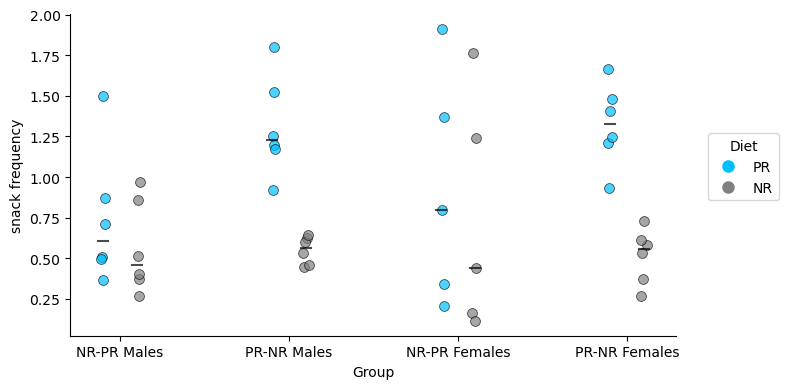

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data extraction using your actual function
nrpr_avg = get_data_fields(mice, ["pr_snack_frequency","nr_snack_frequency"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_snack_frequency", "nr_snack_frequency"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_snack_frequency","nr_snack_frequency"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_snack_frequency","nr_snack_frequency"], prnr_female_selector)

# Combine all data for easier plotting
data = [nrpr_avg[0], nrpr_avg[1], prnr_avg[0], prnr_avg[1],
        nrprf_avg[0], nrprf_avg[1], prnrf_avg[0], prnrf_avg[1]]

group_labels = ["NR-PR Males (PR)", "NR-PR Males (NR)", "PR-NR Males (PR)", "PR-NR Males (NR)",
                "NR-PR Females (PR)", "NR-PR Females (NR)", "PR-NR Females (PR)", "PR-NR Females (NR)"]

colors = {"PR": "deepskyblue", "NR": "grey"}
offset = {"PR": -0.1, "NR": 0.1}  # Reduced offset for compactness
group_mapping = {
    "NR-PR Males (PR)": ("NR-PR Males", "PR"),
    "NR-PR Males (NR)": ("NR-PR Males", "NR"),
    "PR-NR Males (PR)": ("PR-NR Males", "PR"),
    "PR-NR Males (NR)": ("PR-NR Males", "NR"),
    "NR-PR Females (PR)": ("NR-PR Females", "PR"),
    "NR-PR Females (NR)": ("NR-PR Females", "NR"),
    "PR-NR Females (PR)": ("PR-NR Females", "PR"),
    "PR-NR Females (NR)": ("PR-NR Females", "NR")
}

group_positions = {
    "NR-PR Males": 0,
    "PR-NR Males": 1,
    "NR-PR Females": 2,
    "PR-NR Females": 3
}

# Create a figure and axis with smaller size for compactness
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the scatter plot with reduced jitter and smaller markers
jitter_strength = 0.02  # Reduced jitter for more compact spacing
for i, group_label in enumerate(group_labels):
    group, diet = group_mapping[group_label]
    jitter = np.random.uniform(-jitter_strength, jitter_strength, size=len(data[i]))
    x_positions = [group_positions[group] + offset[diet] + jitter_val for jitter_val in jitter]
    sns.scatterplot(x=x_positions, y=data[i], color=colors[diet], s=50, alpha=0.7, edgecolor="black")  # Smaller markers

# Add median lines with slight adjustments for compactness
for group in ["NR-PR Males", "PR-NR Males", "NR-PR Females", "PR-NR Females"]:
    for diet in ["PR", "NR"]:
        relevant_data = []
        for group_label in group_labels:
            mapped_group, mapped_diet = group_mapping[group_label]
            if mapped_group == group and mapped_diet == diet:
                relevant_data.extend(data[group_labels.index(group_label)])
        median_value = np.median(relevant_data)
        x_val = group_positions[group] + offset[diet]
        ax.plot([x_val - 0.03, x_val + 0.03], [median_value, median_value], color='k', linewidth=1.5, alpha=0.7)

# Customize the legend by manually adding it
custom_lines = [plt.Line2D([0], [0], color=colors["PR"], marker='o', linestyle='', markersize=8, label='PR'),
                plt.Line2D([0], [0], color=colors["NR"], marker='o', linestyle='', markersize=8, label='NR')]
plt.legend(handles=custom_lines, title="Diet", loc="upper right", frameon=True, borderaxespad=-3, bbox_to_anchor=(1.1, 0.5))

# Customize the plot aesthetics with tighter spacing
plt.xticks([group_positions["NR-PR Males"], group_positions["PR-NR Males"],
            group_positions["NR-PR Females"], group_positions["PR-NR Females"]],
           ["NR-PR Males", "PR-NR Males", "NR-PR Females", "PR-NR Females"], fontsize=10)
plt.xlabel("Group")
plt.ylabel("snack frequency")

# Remove the background grid lines and spines
plt.grid(False)
sns.despine()

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Save the figure if needed
# fig.savefig("pellets_scatter_plot_compact.pdf")


6 items in output dictionary
6 items in output dictionary


c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


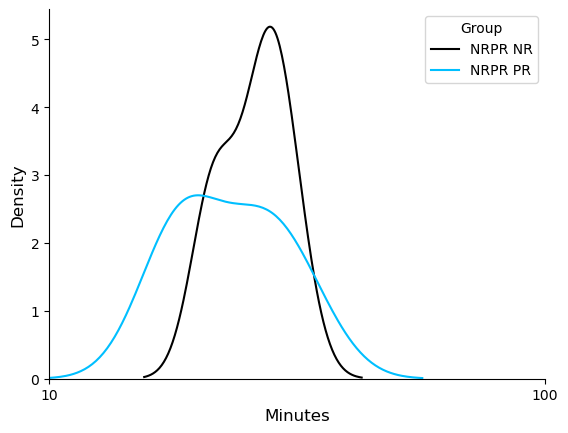

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import trompy as tp

def intermeal_interval_plot(data, ax=[], colors=[], fill=False, labels=[], linestyle="-", xlim=(1, 2), **kwargs):
    """
    FED3 Viz: Plot a KDE of intermeal intervals for multiple groups.
    Parameters
    ----------
    data : list of lists
        Intermeal intervals for each group (e.g., for NRPR and PRNR)
    ax : matplotlib.axes.Axes
        Axes to plot on, a new Figure and Axes are
        created if not passed
    colors : list of str
        List of colors for each group
    fill : bool
        Whether to fill the area under the KDE curve
    labels : list of str
        List of labels for each group
    linestyle : str
        Line style for the KDE plot
    xlim : tuple of floats
        The limits for the x-axis (in log10 scale)
    **kwargs :
        Additional keyword arguments to pass to seaborn.kdeplot
    Returns
    -------
    ax : matplotlib.axes.Axes
        The axes object with the plot
    """

    if ax == []:
        f, ax = plt.subplots()

    if len(colors) != len(data):
        colors = ["grey"] * len(data)

    if len(labels) != len(data):
        labels = [str(n) for n in range(len(data))]

    for idx, group in enumerate(data):
        if not isinstance(group, list) or not group:
            print(f"Skipping group {idx} due to improper format or empty data.")
            continue

        try:
            # Directly use the data without flattening
            y = [np.log10(val * 60) for val in group if val > 0]
        except Exception as e:
            print(f"Error processing data for group {idx}: {e}")
            y = []

        if y:
            sns.kdeplot(y, ax=ax,
                        color=colors[idx],
                        fill=fill,
                        label=labels[idx],
                        linestyle=linestyle)

    ax.set_ylabel('Density', fontsize=12)
    ax.set_xlabel('Minutes', fontsize=12)

    # Set x-axis ticks for the log10 range from 10 to 100 minutes
    ax.set_xticks([1, 2])
    ax.set_xticklabels([10, 100])

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Set x-axis limits to focus on the relevant range (10 to 100 minutes)
    ax.set_xlim(xlim)

    if labels:
        ax.legend(title="Group")

    return ax

# Example usage for plotting intermeal intervals
nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}

IMIs_m_nrpr_pr = get_data_fields(mice, ["intermeal_interval_pr"], nrpr_male_selector)
IMIs_m_nrpr_nr = get_data_fields(mice, ["intermeal_interval_nr"], nrpr_male_selector)

# IMIs_m_prnr_pr = get_data_fields(mice, ["intermeal_interval_pr"], prnr_male_selector)
# IMIs_m_prnr_nr = get_data_fields(mice, ["intermeal_interval_nr"], prnr_male_selector)

f, ax = plt.subplots()

intermeal_interval_plot([IMIs_m_nrpr_nr, IMIs_m_nrpr_pr],
                        colors=["black", "deepskyblue"],
                        linestyle="-",
                        ax=ax,
                        labels=["NRPR NR", "NRPR PR"],
                        xlim=(1, 2))  # Set x-axis limits to focus on 10 to 100 minutes

# intermeal_interval_plot([IMIs_m_prnr_nr, IMIs_m_prnr_pr],
#                         colors=["black", "deepskyblue"],
#                         linestyle="--",
#                         ax=ax,
#                         labels=["PRNR NR", "PRNR PR"],
#                         xlim=(1, 2))  # Set x-axis limits to focus on 10 to 100 minutes

ax.legend(title="Group")


6 items in output dictionary
6 items in output dictionary


c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


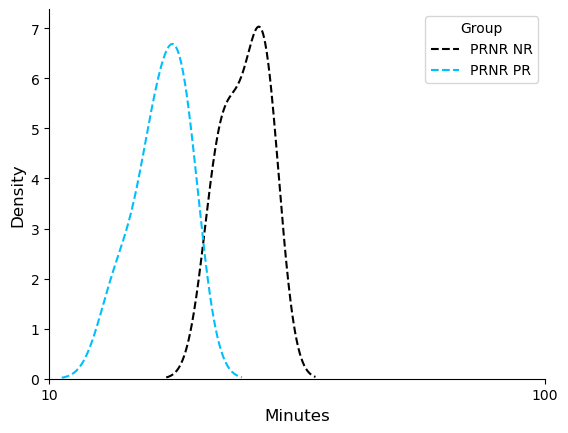

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import trompy as tp

def intermeal_interval_plot(data, ax=[], colors=[], fill=False, labels=[], linestyle="-", xlim=(1, 2), **kwargs):
    """
    FED3 Viz: Plot a KDE of intermeal intervals for multiple groups.
    Parameters
    ----------
    data : list of lists
        Intermeal intervals for each group (e.g., for NRPR and PRNR)
    ax : matplotlib.axes.Axes
        Axes to plot on, a new Figure and Axes are
        created if not passed
    colors : list of str
        List of colors for each group
    fill : bool
        Whether to fill the area under the KDE curve
    labels : list of str
        List of labels for each group
    linestyle : str
        Line style for the KDE plot
    xlim : tuple of floats
        The limits for the x-axis (in log10 scale)
    **kwargs :
        Additional keyword arguments to pass to seaborn.kdeplot
    Returns
    -------
    ax : matplotlib.axes.Axes
        The axes object with the plot
    """

    if ax == []:
        f, ax = plt.subplots()

    if len(colors) != len(data):
        colors = ["grey"] * len(data)

    if len(labels) != len(data):
        labels = [str(n) for n in range(len(data))]

    for idx, group in enumerate(data):
        if not isinstance(group, list) or not group:
            print(f"Skipping group {idx} due to improper format or empty data.")
            continue

        try:
            # Directly use the data without flattening
            y = [np.log10(val * 60) for val in group if val > 0]
        except Exception as e:
            print(f"Error processing data for group {idx}: {e}")
            y = []

        if y:
            sns.kdeplot(y, ax=ax,
                        color=colors[idx],
                        fill=fill,
                        label=labels[idx],
                        linestyle=linestyle)

    ax.set_ylabel('Density', fontsize=12)
    ax.set_xlabel('Minutes', fontsize=12)

    # Set x-axis ticks for the log10 range from 10 to 100 minutes
    ax.set_xticks([1, 2])
    ax.set_xticklabels([10, 100])

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Set x-axis limits to focus on the relevant range (10 to 100 minutes)
    ax.set_xlim(xlim)

    if labels:
        ax.legend(title="Group")

    return ax

# Example usage for plotting intermeal intervals
nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}

# IMIs_m_nrpr_pr = get_data_fields(mice, ["intermeal_interval_pr"], nrpr_male_selector)
# IMIs_m_nrpr_nr = get_data_fields(mice, ["intermeal_interval_nr"], nrpr_male_selector)

IMIs_m_prnr_pr = get_data_fields(mice, ["intermeal_interval_pr"], prnr_male_selector)
IMIs_m_prnr_nr = get_data_fields(mice, ["intermeal_interval_nr"], prnr_male_selector)

f, ax = plt.subplots()

# intermeal_interval_plot([IMIs_m_nrpr_nr, IMIs_m_nrpr_pr],
#                         colors=["black", "deepskyblue"],
#                         linestyle="-",
#                         ax=ax,
#                         labels=["NRPR NR", "NRPR PR"],
#                         xlim=(1, 2))  # Set x-axis limits to focus on 10 to 100 minutes

intermeal_interval_plot([IMIs_m_prnr_nr, IMIs_m_prnr_pr],
                        colors=["black", "deepskyblue"],
                        linestyle="--",
                        ax=ax,
                        labels=["PRNR NR", "PRNR PR"],
                        xlim=(1, 2))  # Set x-axis limits to focus on 10 to 100 minutes

ax.legend(title="Group")


6 items in output dictionary
6 items in output dictionary


c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


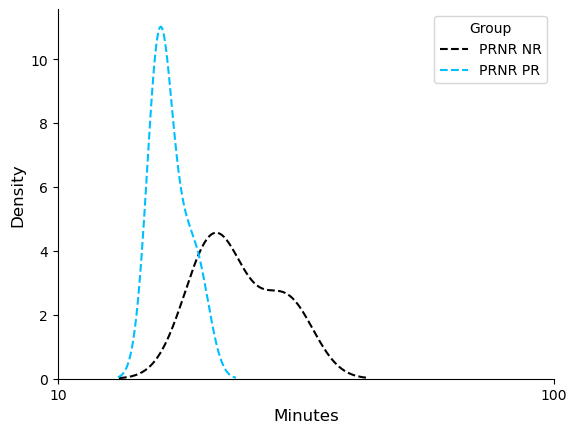

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import trompy as tp

def intermeal_interval_plot(data, ax=[], colors=[], fill=False, labels=[], linestyle="-", xlim=(1, 2), **kwargs):
    """
    FED3 Viz: Plot a KDE of intermeal intervals for multiple groups.
    Parameters
    ----------
    data : list of lists
        Intermeal intervals for each group (e.g., for NRPR and PRNR)
    ax : matplotlib.axes.Axes
        Axes to plot on, a new Figure and Axes are
        created if not passed
    colors : list of str
        List of colors for each group
    fill : bool
        Whether to fill the area under the KDE curve
    labels : list of str
        List of labels for each group
    linestyle : str
        Line style for the KDE plot
    xlim : tuple of floats
        The limits for the x-axis (in log10 scale)
    **kwargs :
        Additional keyword arguments to pass to seaborn.kdeplot
    Returns
    -------
    ax : matplotlib.axes.Axes
        The axes object with the plot
    """

    if ax == []:
        f, ax = plt.subplots()

    if len(colors) != len(data):
        colors = ["grey"] * len(data)

    if len(labels) != len(data):
        labels = [str(n) for n in range(len(data))]

    for idx, group in enumerate(data):
        if not isinstance(group, list) or not group:
            print(f"Skipping group {idx} due to improper format or empty data.")
            continue

        try:
            # Directly use the data without flattening
            y = [np.log10(val * 60) for val in group if val > 0]
        except Exception as e:
            print(f"Error processing data for group {idx}: {e}")
            y = []

        if y:
            sns.kdeplot(y, ax=ax,
                        color=colors[idx],
                        fill=fill,
                        label=labels[idx],
                        linestyle=linestyle)

    ax.set_ylabel('Density', fontsize=12)
    ax.set_xlabel('Minutes', fontsize=12)

    # Set x-axis ticks for the log10 range from 10 to 100 minutes
    ax.set_xticks([1, 2])
    ax.set_xticklabels([10, 100])

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Set x-axis limits to focus on the relevant range (10 to 100 minutes)
    ax.set_xlim(xlim)

    if labels:
        ax.legend(title="Group")

    return ax

# Example usage for plotting intermeal intervals
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"}

# IMIs_m_nrpr_pr = get_data_fields(mice, ["intermeal_interval_pr"], nrpr_male_selector)
# IMIs_m_nrpr_nr = get_data_fields(mice, ["intermeal_interval_nr"], nrpr_male_selector)

IMIs_f_prnr_pr = get_data_fields(mice, ["intermeal_interval_pr"], prnr_female_selector)
IMIs_f_prnr_nr = get_data_fields(mice, ["intermeal_interval_nr"], prnr_female_selector)

f, ax = plt.subplots()

# intermeal_interval_plot([IMIs_m_nrpr_nr, IMIs_m_nrpr_pr],
#                         colors=["black", "deepskyblue"],
#                         linestyle="-",
#                         ax=ax,
#                         labels=["NRPR NR", "NRPR PR"],
#                         xlim=(1, 2))  # Set x-axis limits to focus on 10 to 100 minutes

intermeal_interval_plot([IMIs_f_prnr_nr, IMIs_f_prnr_pr],
                        colors=["black", "deepskyblue"],
                        linestyle="--",
                        ax=ax,
                        labels=["PRNR NR", "PRNR PR"],
                        xlim=(1, 2))  # Set x-axis limits to focus on 10 to 100 minutes

ax.legend(title="Group")


# trying to plot trend of meals, megameals and snacks